In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [123]:
apple_df=yf.download("AAPL",start="2020-01-01",end="2025-08-15")

/tmp/ipython-input-756028930.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_df=yf.download("AAPL",start="2020-01-01",end="2025-08-15")
[*********************100%***********************]  1 of 1 completed


In [124]:
apple_df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538528,72.598907,71.292319,71.545905,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000
2020-01-08,73.224396,73.526287,71.768071,71.768071,132079200
...,...,...,...,...,...
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100


In [125]:
close_price=apple_df['Close'].values.reshape(-1,1)
close_price

array([[ 72.53852844],
       [ 71.8332901 ],
       [ 72.4056778 ],
       ...,
       [229.6499939 ],
       [233.33000183],
       [232.77999878]])

In [105]:
## Normalize


In [126]:
mms = MinMaxScaler()
scaled_prices = mms.fit_transform(close_price)

In [127]:
def prepare_data(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

In [128]:
X, y = prepare_data(scaled_prices, 10)


In [129]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [130]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [146]:
gru = Sequential([
    GRU(64, return_sequences=True, input_shape=(10, 1)),
    Dropout(0.2),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(64),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [147]:
gru.compile(optimizer='adam', loss='mse', metrics=["accuracy"])


In [148]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    verbose=1
)

In [149]:
history = gru.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0011 - loss: 0.0796 - val_accuracy: 0.0000e+00 - val_loss: 0.0065
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 8.7335e-04 - loss: 0.0067 - val_accuracy: 0.0000e+00 - val_loss: 4.6871e-04
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0014 - loss: 0.0036 - val_accuracy: 0.0000e+00 - val_loss: 0.0012
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0020 - loss: 0.0051 - val_accuracy: 0.0000e+00 - val_loss: 0.0015
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 5.5611e-04 - loss: 0.0053 - val_accuracy: 0.0000e+00 - val_loss: 6.2027e-04
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0011 - loss: 0.0037 - val_accuracy: 0.0000e+00 - val_loss: 5.4545e-04
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 8.3232e-04 - loss: 0.0033 - val_accuracy: 0.0000e+00 - val_loss: 6.2972e-04
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accu

In [150]:
gru.compile(optimizer='adam',loss='mse',metrics=["accuracy"])

In [151]:
gru.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_11 (GRU)                    │ (None, 10, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12 (GRU)                    │ (None, 10, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,849 (245.50 KB)

 Trainable params: 62,849 (245.50 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
y_pred = gru.predict(X_val)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [155]:


original_y_val = mms.inverse_transform(y_val_reshaped)
original_y_pred = mms.inverse_transform(y_pred_reshaped)

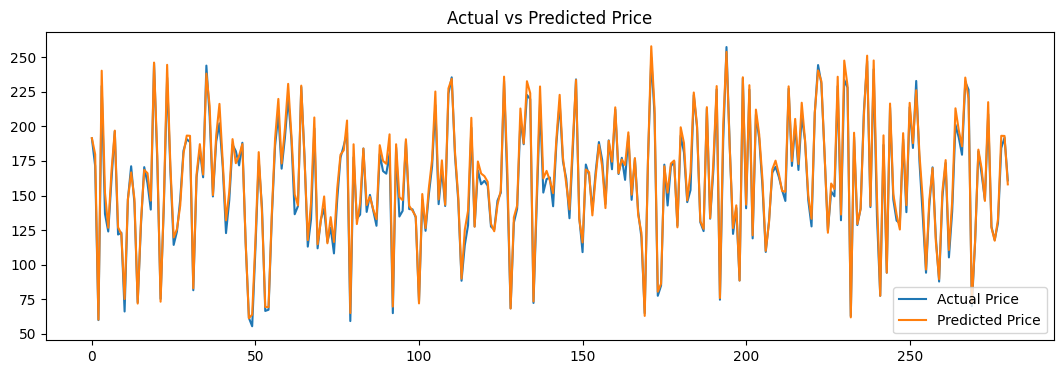

In [163]:
plt.figure(figsize=(13, 4))
plt.plot(original_y_val, label="Actual Price")
plt.plot(original_y_pred, label="Predicted Price")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.show()